In [1]:
import pandas as pd
import numpy as np
import evaluation

## load_data

In [6]:
# load prices
prices = pd.read_csv('example_prices.csv', index_col='dates', parse_dates=['dates'])
ret = prices.diff()

<Axes: xlabel='dates'>

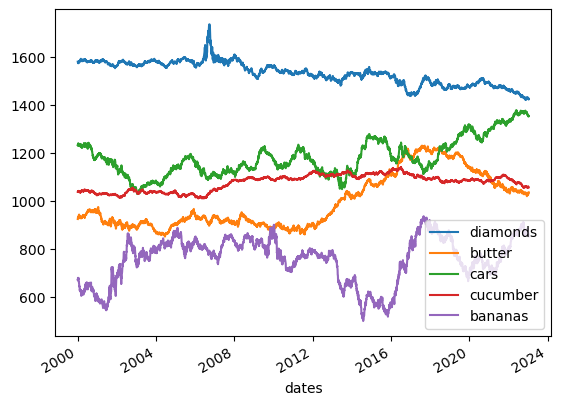

In [3]:
prices.plot()

## enter your own trading strategy here

In [9]:
def trend_model_vectorized_risk_adjusted(ret, trend_window=50, vol_window=100, risk_window=100):
    # calculate vol
    vol = np.sqrt((ret**2).rolling(window=vol_window, min_periods=vol_window//2).sum())
    # calculate signal
    sig = np.sign(ret.rolling(window=trend_window).sum())
    # scale with inverse vol to get pos
    pos = sig/vol
    # calculate model risk
    model_risk = (pos.shift(2)*ret).dropna(how='all').sum(axis=1).rolling(risk_window, min_periods=20).std()
    # adjust with model risk
    pos_adjusted = pos.div(model_risk, axis=0)
    return pos_adjusted

position = trend_model_vectorized_risk_adjusted(ret)

## evaluate results

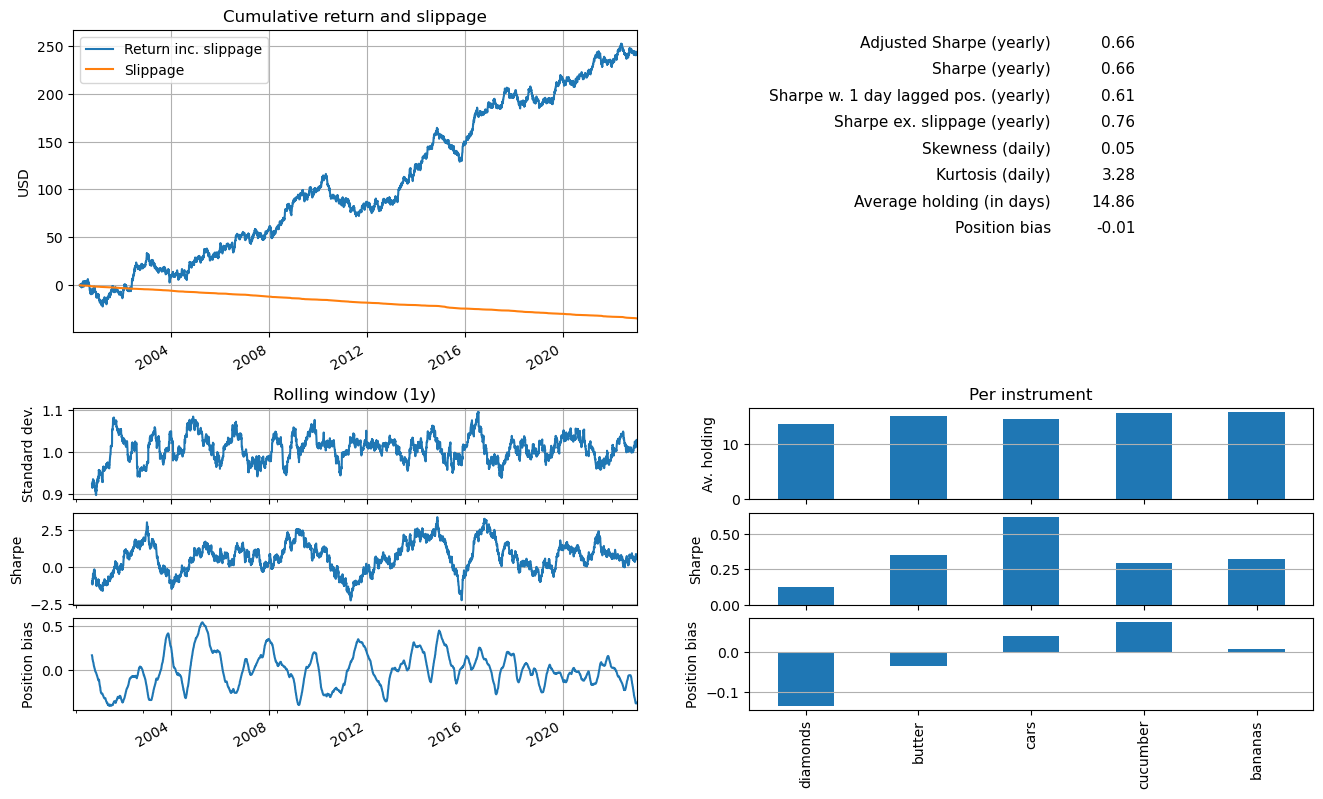

In [10]:
evaluation.plot_key_figures(position, prices)

## save your positions to a file

In [5]:
position.to_csv('results.csv')